# GROUP 14

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
data.shape

(167, 10)

In [4]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [5]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [6]:
data1=data.drop('country',axis=1)
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# K-Mean Clustering

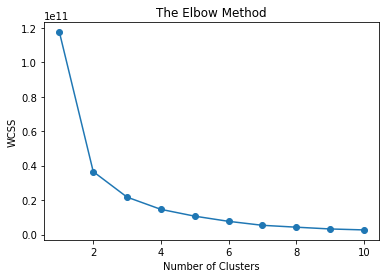

In [7]:
#Find the optimum number of clusters 
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Number of clusters=3

In [8]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [9]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(data1, y_kmeans, metric='euclidean')
print('Silhouette Score = ',sil_score)

Silhouette Score =  0.7003508054481694


In [10]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(data1)
x_pca.shape

(167, 2)

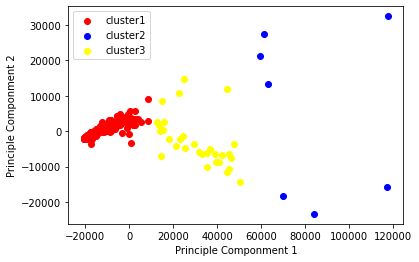

In [11]:
plt.scatter(x_pca[y_kmeans == 0,0], x_pca[y_kmeans == 0,1], c = 'red', label = 'cluster1')
plt.scatter(x_pca[y_kmeans == 1,0], x_pca[y_kmeans == 1,1], c = 'blue', label = 'cluster2')
plt.scatter(x_pca[y_kmeans == 2,0], x_pca[y_kmeans == 2,1], c = 'yellow', label = 'cluster3')
plt.xlabel("Principle Componment 1")
plt.ylabel("Principle Componment 2")
plt.legend()
plt.show()

In [13]:
type(x_pca)

numpy.ndarray

In [14]:
data['kmeans']=y_kmeans

In [29]:
#CLUSTER 0
data[data['kmeans']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,2


In [16]:
#CLUSTER 1
data[data['kmeans']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1
82,Kuwait,10.8,66.7,2.63,30.4,75200,11.200,78.2,2.21,38500,1
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,1
114,Norway,3.2,39.7,9.48,28.5,62300,5.950,81.0,1.95,87800,1
123,Qatar,9.0,62.3,1.81,23.8,125000,6.980,79.5,2.07,70300,1
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,1
145,Switzerland,4.5,64.0,11.50,53.3,55500,0.317,82.2,1.52,74600,1


In [30]:
#CLUSTER 2
data[data['kmeans']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hc
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,0
49,Equatorial Guinea,111.0,85.8,4.48,58.9,33700,24.900,60.9,5.21,17100,2,1


From the above tables we can see that cluster 0 has low income countries who have low life expectancy too. 

In cluster 2 we do have countries with average income and they do have a good life expectancy. 

Cluster 3 we do have countries with high income and good life expectancy rate too. 

The Aid should be given to cluster 0 countries. 

In [18]:
np.array(data['country'][data['kmeans']==0])

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Barbados', 'Belarus', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Cape Verde', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Fiji',
       'Gabon', 'Gambia', 'Georgia', 'Ghana', 'Grenada', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Hungary', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan',
       'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Latvia', 'Lebanon',
       'Lesotho', 'Liberia', 'Libya', 'Lithuania', 'Macedonia, FYR',
       'Madagascar', 'Malawi

These are the countries to which we should be concentrating more. 

# Hierarchical clustering

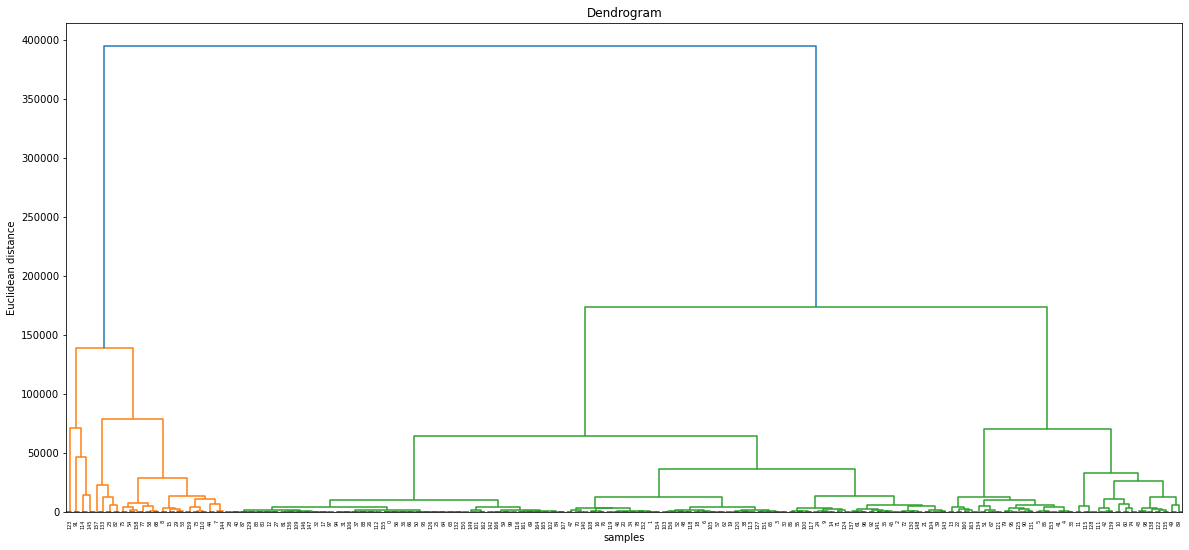

In [19]:
#dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(20,9))
dendrogram = sch.dendrogram(sch.linkage(data1,method='ward'))
plt.hlines(20,0,5000,colors='r',linestyle='--')
plt.title('Dendrogram')
plt.xlabel('samples')
plt.ylabel('Euclidean distance')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data1)
y_hc

array([2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       0, 2, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 0, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 0, 0, 0, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [21]:
sil_score = silhouette_score(data1, y_hc, metric='euclidean')
print('Silhouette Score = ',sil_score)

Silhouette Score =  0.5963166959187518


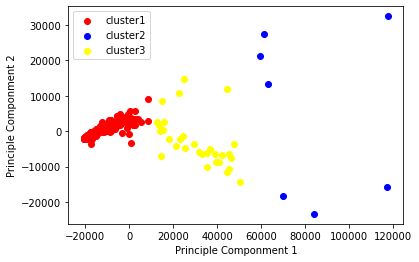

In [22]:
plt.scatter(x_pca[y_kmeans == 0,0], x_pca[y_kmeans == 0,1], c = 'red', label = 'cluster1')
plt.scatter(x_pca[y_kmeans == 1,0], x_pca[y_kmeans == 1,1], c = 'blue', label = 'cluster2')
plt.scatter(x_pca[y_kmeans == 2,0], x_pca[y_kmeans == 2,1], c = 'yellow', label = 'cluster3')
plt.xlabel("Principle Componment 1")
plt.ylabel("Principle Componment 2")
plt.legend()
plt.show()

In [23]:
data['hc']=y_hc

In [24]:
#CLUSTER 0
data[data['hc']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hc
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,2,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,2,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,2,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,1,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,2,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,2,0
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,2,0
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,2,0
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,2,0
68,Iceland,2.6,53.4,9.40,43.3,38800,5.470,82.0,2.20,41900,2,0


In [25]:
#CLUSTER 1
data[data['hc']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hc
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0,1
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0,1
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,2,1
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,2,1
13,Barbados,14.2,39.5,7.97,48.7,15300,0.321,76.7,1.78,16000,0,1
22,Brazil,19.8,10.7,9.01,11.8,14500,8.410,74.2,1.80,11200,0,1
33,Chile,8.7,37.7,7.96,31.3,19400,8.960,79.1,1.88,12900,0,1
41,Croatia,5.5,37.6,7.76,38.1,20100,0.821,76.3,1.55,13500,0,1
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,2,1
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,2,1


In [27]:
#CLUSTER 2
data[data['hc']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hc
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0,2
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
161,Uzbekistan,36.3,31.7,5.81,28.5,4240,16.50,68.8,2.34,1380,0,2
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,0,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0,2
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0,2


In above tables we can see the custers which were created by the Agglomerative clustering. 
We can see that life expectancy is higher and income too for cluster 0.

Cluster 2, the income and life expectancy is low when compared to other clusters. 

# Conclusion:-
We can use K means clustering mode because it has very good silhoutte score when compared to Agglomerative clustering method. 
We can take three clusters for our model to categorize. 